# **SALES PREDICTION**

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Read and Explore Data**

In [12]:
df=pd.read_csv('/content/Advertising.csv')
df.sample(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
95,96,163.3,31.6,52.9,16.9
135,136,48.3,47.0,8.5,11.6


In [13]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [16]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [17]:
df.duplicated().sum()

0

In [18]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# **Data Preprocessing**

In [19]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.sample(2)

,TV,Radio,Newspaper,Sales
70,199.1,30.6,38.7,18.3
182,56.2,5.7,29.7,8.7


# **Data Visualization**

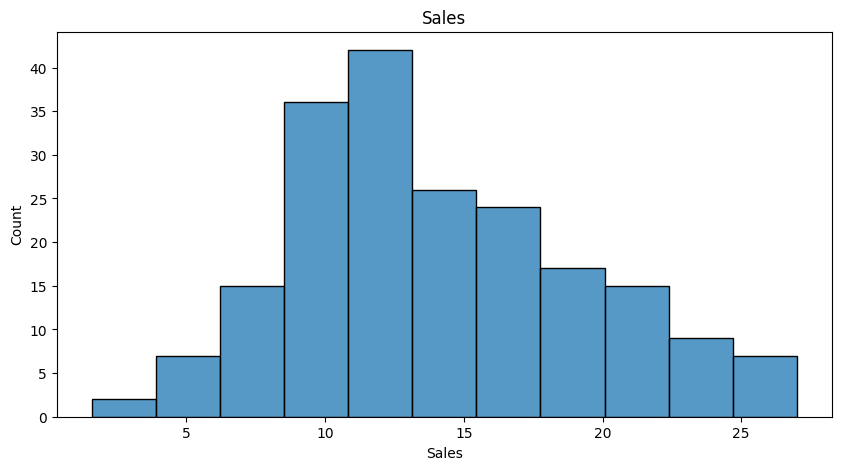

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'])
plt.title('Sales')
plt.show()

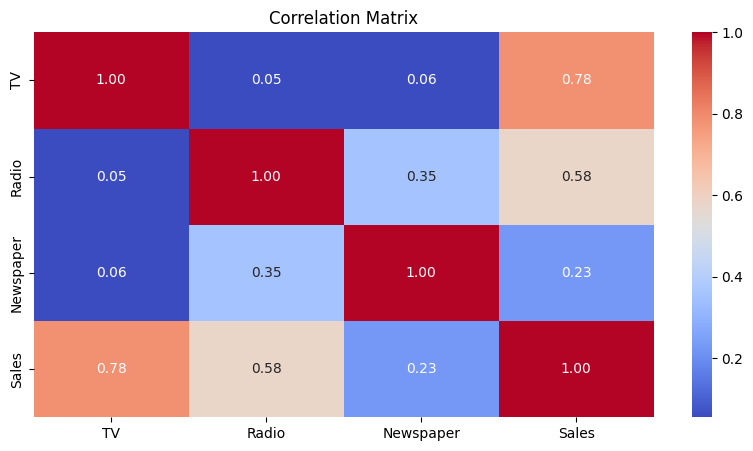

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

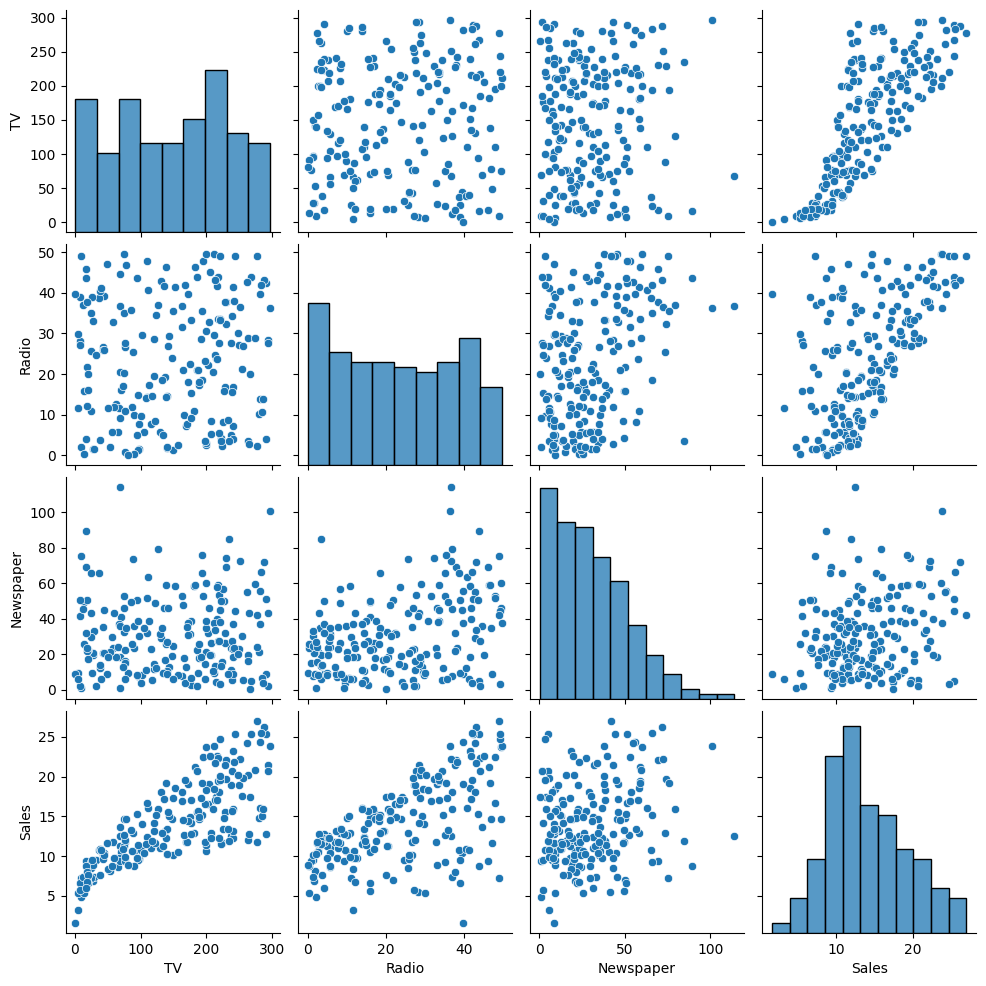

In [22]:
sns.pairplot(df)
plt.show()

# **Training and Testing Data**

In [23]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((160, 3), (40, 3), (160,), (40,))

# **Train LinearRegression Model**

In [29]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [30]:
LR_pred=LR.predict(xtest)

In [39]:
mae = mean_absolute_error(ytest, LR_pred)
mse = mean_squared_error(ytest, LR_pred)
rmse = mse ** 0.5
r2 = r2_score(ytest, LR_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 1.4607567168117603
MSE: 3.1740973539761033
RMSE: 1.78159966153345
R2 Score: 0.899438024100912


# **Train DecisionTree Model**


In [33]:
DT=DecisionTreeRegressor()
DT.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [34]:
DT_pred=DT.predict(xtest)

In [40]:
mae = mean_absolute_error(ytest, DT_pred)
mse = mean_squared_error(ytest, DT_pred)
rmse = mse ** 0.5
r2 = r2_score(ytest, DT_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.9450000000000003
MSE: 1.6725
RMSE: 1.2932517156377563
R2 Score: 0.9470117372170271


# **Train RandomForest Model**

In [36]:
RFR=RandomForestRegressor()
RFR.fit(xtrain,ytrain)

RandomForestRegressor()

In [37]:
RFR_pred=RFR.predict(xtest)


In [41]:
mae = mean_absolute_error(ytest, RFR_pred)
mse = mean_squared_error(ytest, RFR_pred)
rmse = mse ** 0.5
r2 = r2_score(ytest, RFR_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.6068749999999987
MSE: 0.5337660250000008
RMSE: 0.7305929270120268
R2 Score: 0.9830891872063839
